In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

In [62]:
def fields(vy0=0, vz0=0, dt=1e-3, switch=True):
    x0 = 0
    y0 = 0
    z0 = 0
    t0 = 0
    vx0 = 0 #Just for consistency - all parts of question specify vx0 = 0
    
    #All units in SI
    E0 = 1e-6
    B0 = 1e-6
    e = 1.6*1e-19
    m = 1.67*1e-27
    
    M = e*E0/m
    N = e*B0/m
    
    x_pos = []
    y_pos = []
    z_pos = []
    times = []
    
    
    x_pos.append(x0)    
    y_pos.append(y0)
    z_pos.append(z0)
    times.append(t0)
    
    y1 = y0 + vy0*dt
    y_pos.append(y1)
    t = t0 + dt
    times.append(t)
    
    counter = 0
    
    def solver(x0, x1, y0, y1, z0, z1, t, counter, switch):
        counter += 1
        
        y2 = 2*y1 - y0 - N*(x1 - x0)*dt  
        t = t + dt
        
        if switch:
            x2 = 2*x1 - x0 + M*(dt**2) + N*(y1 - y0)*dt
            z2 = z1 + vz0*dt
        else:
            z2 = 2*z1 - z0 + M*(dt**2)
            x2 = 2*x1 - x0 + N*(y1 - y0)*dt
        
        x0 = x1
        z0 = z1
        x1 = x2
        z1 = z2
        y0 = y1
        y1 = y2
        
        x_pos.append(x2)
        y_pos.append(y2)
        z_pos.append(z2)
        times.append(t)
        
        if counter <= 1000:
            return solver(x0, x1, y0, y1, z0, z1, t, counter, switch)
        else:
            return None
    
    if switch:
        x1 = M*(dt**2)/2
        z1 = z0 + vz0*dt
        x_pos.append(x1)   
        z_pos.append(z1)
        solver(x0, x1, y0, y1, z0, z1, t, counter, switch)
    else:
        z1 = M*(dt**2)/2
        x1 = x0 + vx0*dt
        x_pos.append(x1)   
        z_pos.append(z1)
        solver(x0, x1, y0, y1, z0, z1, t, counter, switch)
    
    return np.array(x_pos), np.array(y_pos), np.array(z_pos), np.array(times)

In [67]:
a = fields()
b = fields(vz0=10)
c = fields(vy0=10)
d = fields(vy0=10, switch=False)

<IPython.core.display.Javascript object>


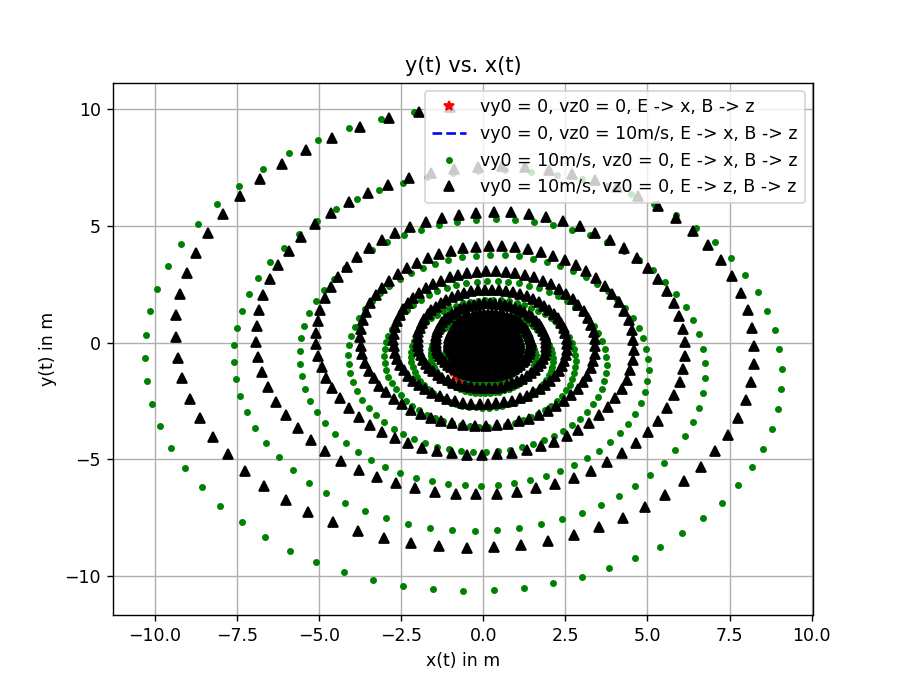

<IPython.core.display.Javascript object>


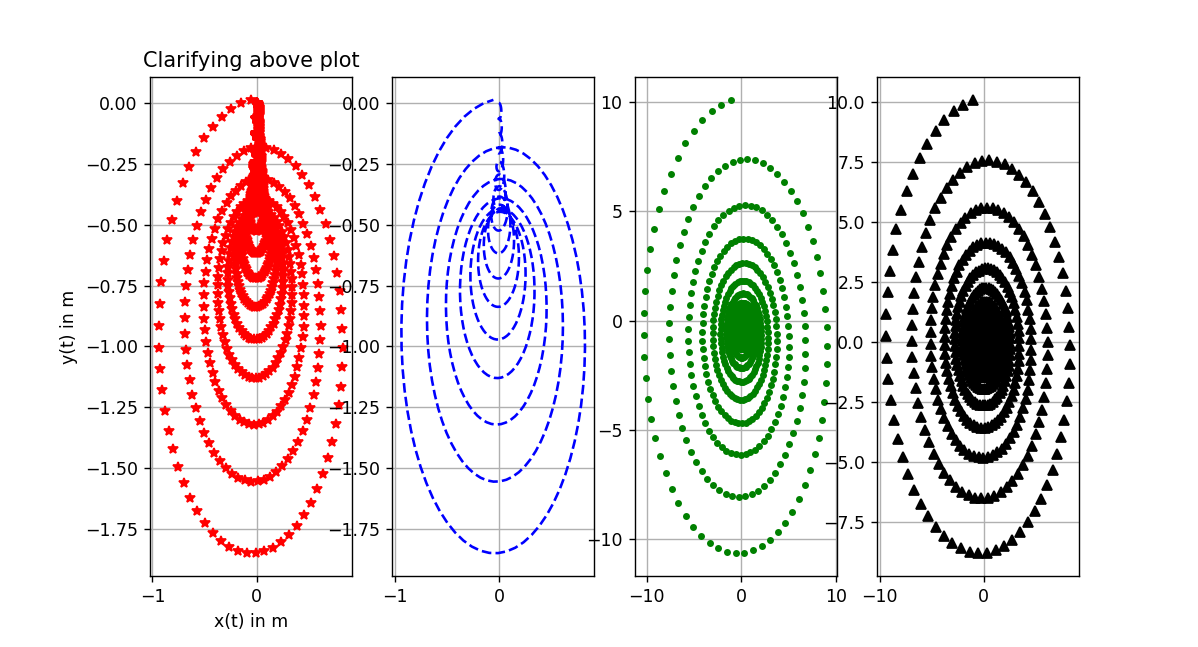

<IPython.core.display.Javascript object>


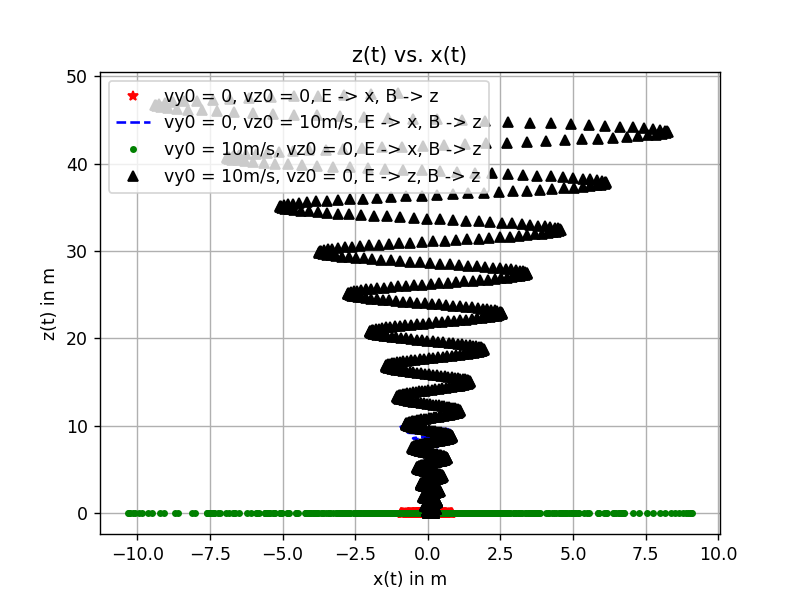

<IPython.core.display.Javascript object>


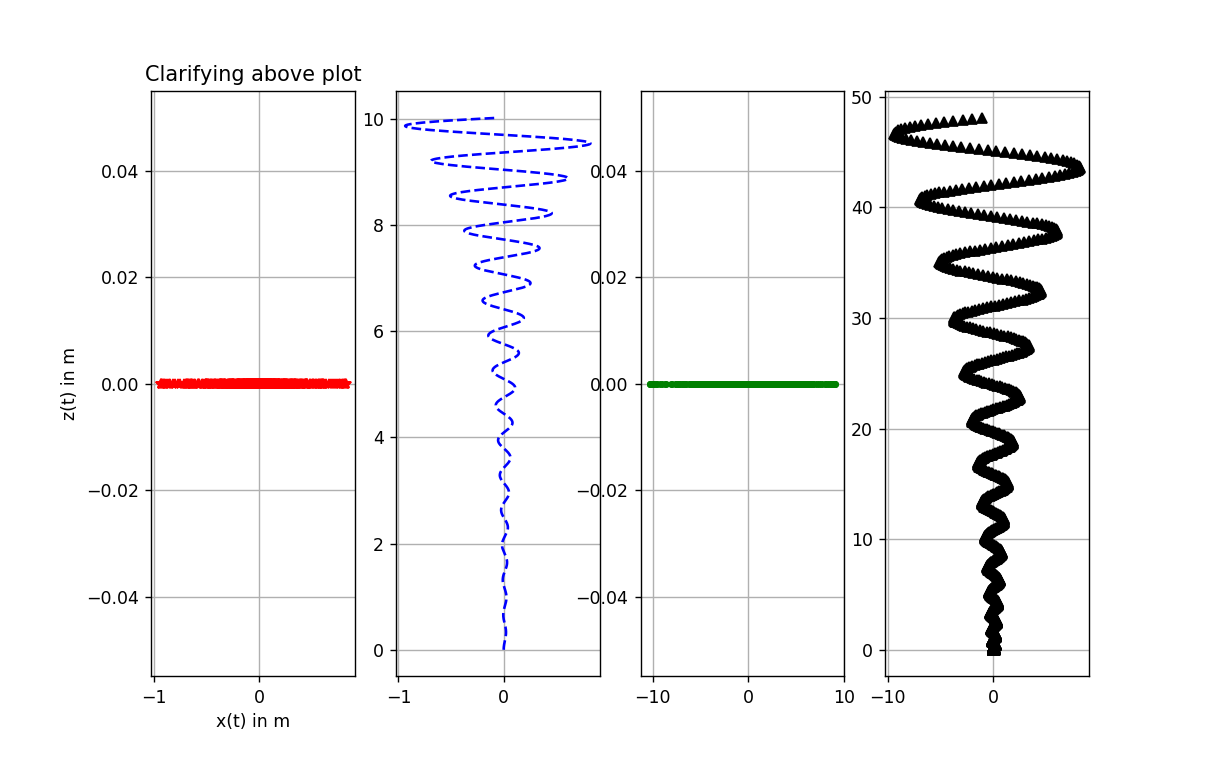

<IPython.core.display.Javascript object>


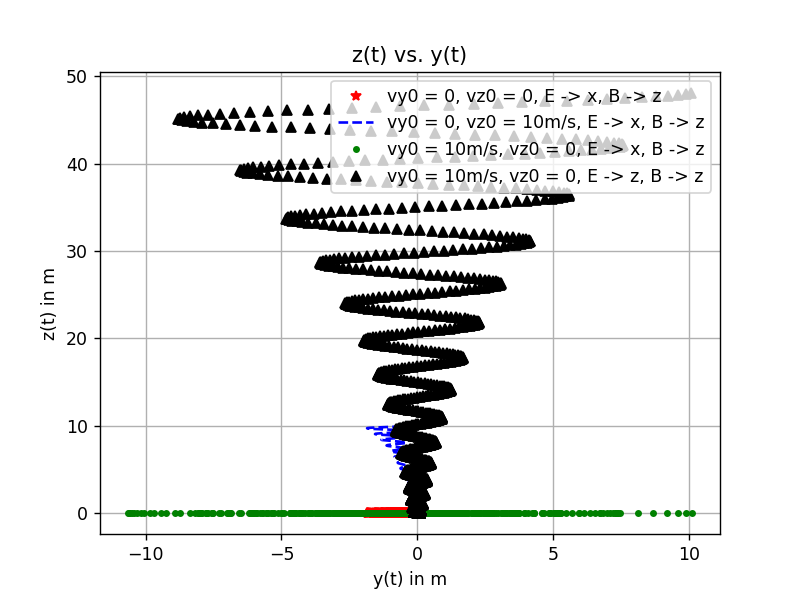

<IPython.core.display.Javascript object>


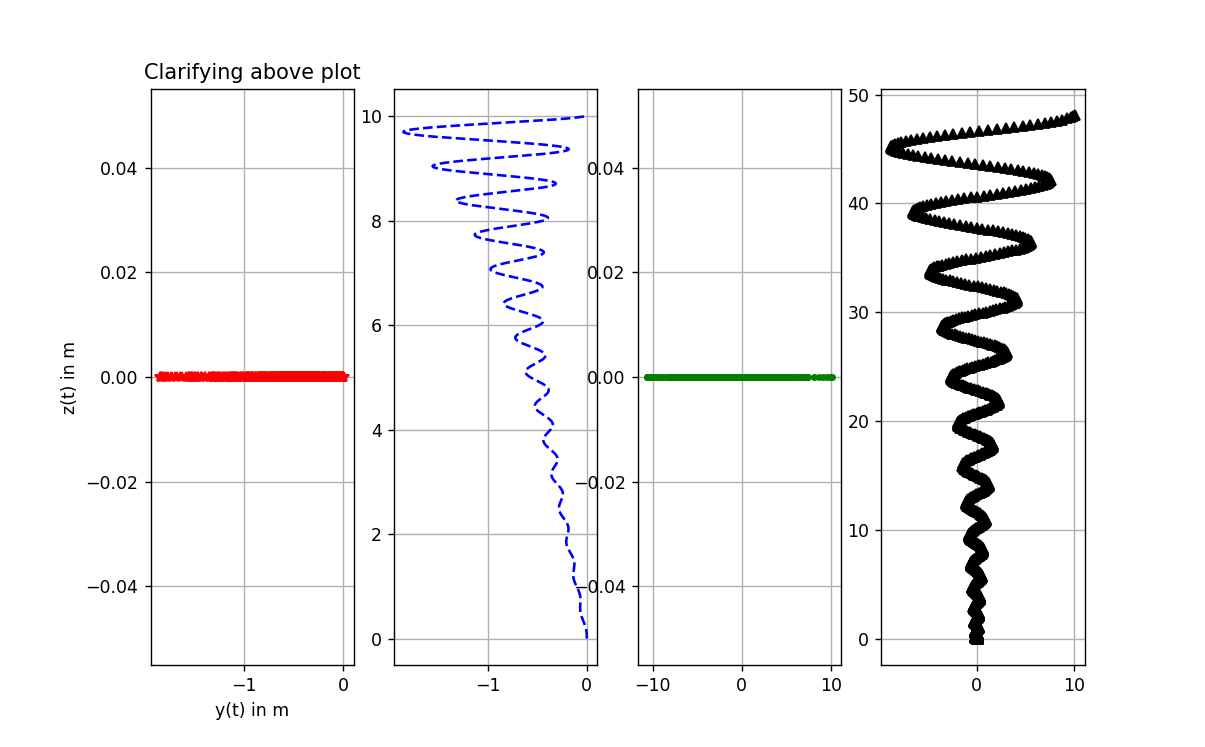

In [68]:
plt.close()

plt.figure()
plt.plot(a[0], a[1], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
plt.plot(b[0], b[1], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
plt.plot(c[0], c[1], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
plt.plot(d[0], d[1], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
plt.title("y(t) vs. x(t)")
plt.grid(True)
plt.legend()
plt.xlabel("x(t) in m")
plt.ylabel("y(t) in m")
plt.show()

fig1, ax = plt.subplots(1, 4)
ax[0].plot(a[0], a[1], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
ax[0].set_xlabel("x(t) in m")
ax[0].set_ylabel("y(t) in m")
ax[0].grid(True)
ax[0].set_title("Clarifying above plot")

ax[1].plot(b[0], b[1], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
ax[1].grid(True)

ax[2].plot(c[0], c[1], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
ax[2].grid(True)

ax[3].plot(d[0], d[1], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
ax[3].grid(True)

plt.show()


plt.figure()
plt.plot(a[0], a[2], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
plt.plot(b[0], b[2], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
plt.plot(c[0], c[2], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
plt.plot(d[0], d[2], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
plt.title("z(t) vs. x(t)")
plt.grid(True)
plt.legend()
plt.xlabel("x(t) in m")
plt.ylabel("z(t) in m")
plt.show()


fig2, ax = plt.subplots(1, 4)
ax[0].plot(a[0], a[2], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
ax[0].set_xlabel("x(t) in m")
ax[0].set_ylabel("z(t) in m")
ax[0].grid(True)
ax[0].set_title("Clarifying above plot")

ax[1].plot(b[0], b[2], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
ax[1].grid(True)

ax[2].plot(c[0], c[2], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
ax[2].grid(True)

ax[3].plot(d[0], d[2], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
ax[3].grid(True)

plt.show()


plt.figure()
plt.plot(a[1], a[2], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
plt.plot(b[1], b[2], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
plt.plot(c[1], c[2], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
plt.plot(d[1], d[2], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
plt.title("z(t) vs. y(t)")
plt.grid(True)
plt.legend()
plt.xlabel("y(t) in m")
plt.ylabel("z(t) in m")
plt.show()


fig3, ax = plt.subplots(1, 4)
ax[0].plot(a[1], a[2], 'r*', label= 'vy0 = 0, vz0 = 0, E -> x, B -> z')
ax[0].set_xlabel("y(t) in m")
ax[0].set_ylabel("z(t) in m")
ax[0].grid(True)
ax[0].set_title("Clarifying above plot")

ax[1].plot(b[1], b[2], 'b--', label= 'vy0 = 0, vz0 = 10m/s, E -> x, B -> z')
ax[1].grid(True)

ax[2].plot(c[1], c[2], 'g.', label= 'vy0 = 10m/s, vz0 = 0, E -> x, B -> z')
ax[2].grid(True)

ax[3].plot(d[1], d[2], 'k^', label= 'vy0 = 10m/s, vz0 = 0, E -> z, B -> z')
ax[3].grid(True)

plt.show()